Karpagapriya Dhanraj

# Image reconstruction using singular Value decomposition (SVD) 

##  Project Description:
### Perform SVD on a image and use top singular vectors to reconstruct it.

## What is SVD?
### Singular value decomposition (SVD) provides a way to decompose a matrix into three seperate matrices, allowing us to understand the underlying structure of the orginal matrix.

## Work Flow:
### 1. Upload the image 
### 2. Extract image corresponding to Red color matrix.
### 3. Converting red color image to a numy array matrix
### 4. Plotting the R-band image.
### 5. Perform SVD using np.linalg.svd
### 6. Compute variance explained
### 7. plot the graph for top 20 singular vectors.
### 8. Recinstruct th image using top-K singular vectors.
### 9. Compare the different K values.

#### Import Pakages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

#### Here we are using the Paris map from wikipedia. is loaded

In [2]:
fr_img = "paris_map.jpg"

#### Loading the image 

In [3]:
img = Image.open(fr_img)

#### Viewing the image 

In [4]:
img.show()

#### Viewing the size of the image

In [5]:
img.size

(564, 350)

#### Here the image is stored in matrix, here we are only dealing with one of the color matrix  which is red color. Here we specify the band = 0 to get the red color

In [6]:
red_band = img.getdata(band=0)

#### Convert red color image to a numpy array matix 

In [7]:
img_mat = np.array(list(red_band), float)
img_mat.size

197400

#### Converting 1D numpy array to 2D numpy array 

In [8]:
img_mat.shape = (img.size[1], img.size[0])
img_mat = np.matrix(img_mat)
img_mat

matrix([[255., 255., 255., ..., 255., 255., 252.],
        [255., 255., 255., ..., 255., 254., 254.],
        [255., 255., 255., ..., 252., 251., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]])

#### Checking how the numpy matrix looks like an image using PIL which is a python imaging library.

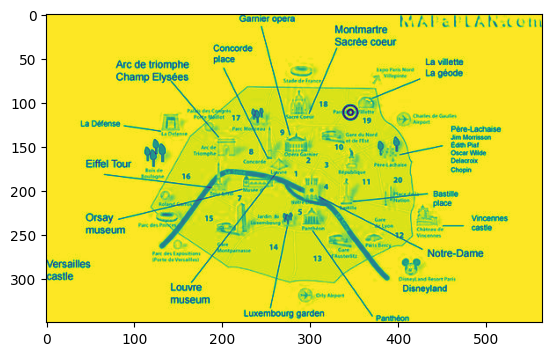

In [9]:
plt.imshow(img_mat)

#### Comparing the original RGB image and a R-band image

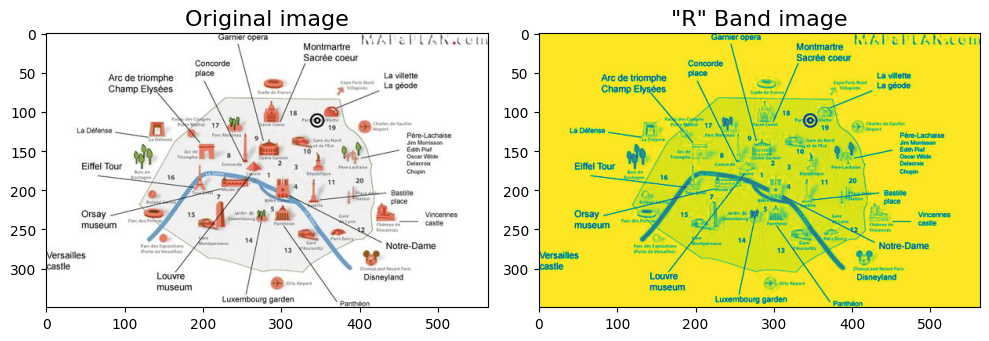

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img)
axs[0].set_title('Original image', size = 16)
axs[1].imshow(img_mat)
axs[1].set_title('"R" Band image', size = 16)
plt.tight_layout()


####  scaling the data before applying SVD. This will help to put the each variable in same scale

In [11]:
img_mat_scaled = (img_mat-img_mat.mean())/img_mat.std()

###### Explanation:
img_mat -Image represented in matrix.

img_mat.mean() - Calculates the mean value of all the pixel value in the image matrix.

Mean is the average brightness level of the entire image.

img_mat_std - Calculates the standard deviation of all pixel values.

Standard deviation is the variation of pixel values around the mean.

(img_mat - img_mat.meam()) - subracts the mean value from each pixel. It centers the pixel value around 0. It helps in 

minimizing the influence of brightness variation across the image.

(img_mat-img_mat.mean())/img_mat.std() - Divides each pixel by standard deviation.

It scales the pixel value by making the variance of pixl value more consistent.

#### Using the numpy's linalg module's SVD function to perform SVD on scaled image.

In [12]:
U, s, V = np.linalg.svd(img_mat_scaled)

###### Explanation:
SVD - Decompose a matrix into three seperate matrix.

U - orthogonal matrix which represents left singular vector of original image vectors. This vector is also known as "eigenfaces". This columns of "U" is orthogonal to eachother and forms a basis for the column space of original image matrix.

V - orthogonal matrix which represents right singular vector of original image vectors. This columns of "V" is orthogonal to eachother and forms a basis for the row space of original image matrix.

s - This is a 1D array containing singular values of image matrix. The singular values represent the amoutn of variance. They are sorted in descending order, meaning the first singular value corresponds to the most significant component, the second singular value corresponds to the second most significant component, and so on.



###### Check the shape of the U and V  matrix.

We can see that both U and V matrices and dimensions matches the image size.

In [13]:
U.shape

(350, 350)

In [14]:
V.shape

(564, 564)

###### Here eigen values are simply a vector ordered in descending order.

In [15]:
s

array([142.63405938, 119.5070061 , 102.2375529 ,  94.42251113,
        92.70530555,  86.08276852,  79.75456167,  73.79384061,
        71.59253103,  67.54206195,  65.12766117,  60.98470328,
        60.08714108,  56.70595926,  54.17166547,  52.95050244,
        51.96722265,  49.95766319,  47.31919721,  45.59429998,
        44.77884512,  43.10870936,  42.54341498,  41.60376129,
        41.09799701,  40.63735999,  39.72432021,  39.48573669,
        38.29852918,  37.17357179,  36.78664533,  35.68833788,
        35.01221753,  34.32365551,  33.91399965,  33.38821484,
        32.86703353,  32.25025842,  31.7668415 ,  31.431759  ,
        30.64537497,  30.45590102,  29.717936  ,  29.54451573,
        29.20902255,  28.64546216,  28.22843594,  27.8727709 ,
        27.39191008,  27.2170705 ,  26.65825832,  26.37934492,
        26.02410599,  25.89535309,  25.53554328,  25.09907106,
        24.94521691,  24.49333506,  24.29973824,  23.76573428,
        23.66886358,  23.4129193 ,  23.07960788,  22.90

###### Compute the variance explained by each singular vectors.
Here we use the eigen values from the SVD to compute the variance.

In [17]:
var = np.round(s**2/np.sum(s**2),decimals = 3)

###### Explanation:
s - 1-D array containing the singular values obtained from the SVD.

's**2' - This squares the singular values. By squaring the singular values converts them to the variance, as variance is the square of the standard deviation.

np.sum(s**2) - This calculates the total sum of squared singular values, which represents the total variance of the image data.

s**2/np.sum(s**2) - This calculates the proportion of variance explained by each singular vector. It does this by dividing the variance (squared singular value) of each component by the total variance of the image data.

np.round(..., decimals=3) - This rounds the variance explained values to three decimal places for better readability.

###### Variance explained top 20 singular vectors

In [18]:
var[0:20]

array([0.103, 0.072, 0.053, 0.045, 0.044, 0.038, 0.032, 0.028, 0.026,
       0.023, 0.021, 0.019, 0.018, 0.016, 0.015, 0.014, 0.014, 0.013,
       0.011, 0.011])

###### Plot the graph using top 20 singular vector of variance explained.

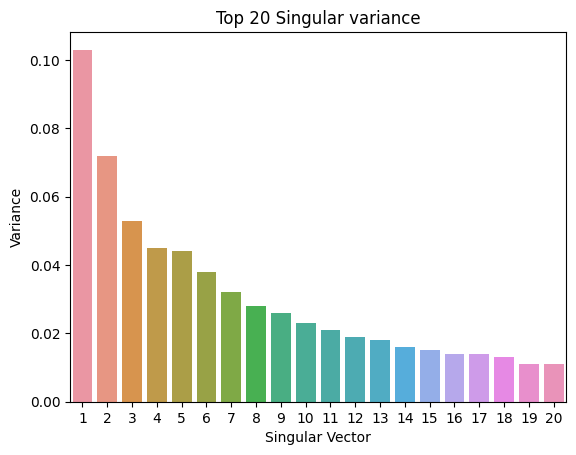

In [19]:
sns.barplot(x=list(range(1,21)),
           y = var[0:20])
plt.xlabel("Singular Vector")
plt.ylabel("Variance")
plt.title("Top 20 Singular variance")
plt.show()

## Reconstructing the image with top-K singular vectors.

The top-K singular vectors captures the most of the variance. So instead of using all the singular vectors and multiplying them as shown in SVD, we can reconstruct the image with top-K singular vectors.

###### Reconstructing the image with top 5 singular vectors.

###### Explanation:
U[:, :num_component] - This extracts the first 'num_component' columns of the matrix U. 

np.diag(s[:num_component]) - This creates a diagonal matrix from the first 'num_component' elements of the array s.

V[:num_component, :]: This extracts the first 'num_component' rows of the matrix V. 

np.matrix(U[:, :num_component]) * np.diag(s[:num_component]) * np.matrix(V[:num_component, :]) - Finally, this expression multiplies these truncated matrices together to reconstruct the original image. The multiplication process combines the selected singular components to form the reconstructed image matrix.

Text(0.5, 1.0, 'Reconstructed image using 5 singular values')

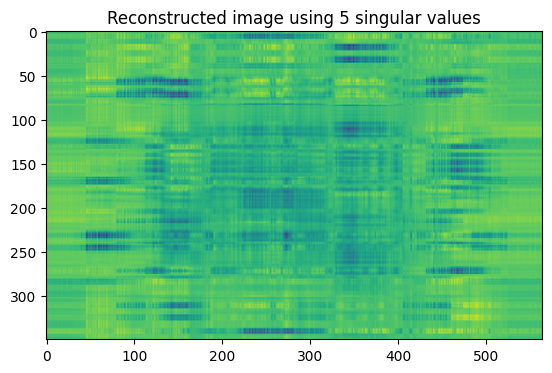

In [31]:
num_component = 5
reconstruct_img_5 = np.matrix(U[:, :num_component]) * np.diag(s[:num_component]) * np.matrix(V[:num_component, :])
plt.imshow(reconstruct_img_5)
plt.title("Reconstructed image using 5 singular values")

###### Reconstructing the image using top 50 singular vectors.

Text(0.5, 1.0, 'Reconstructed image using 50 singular values')

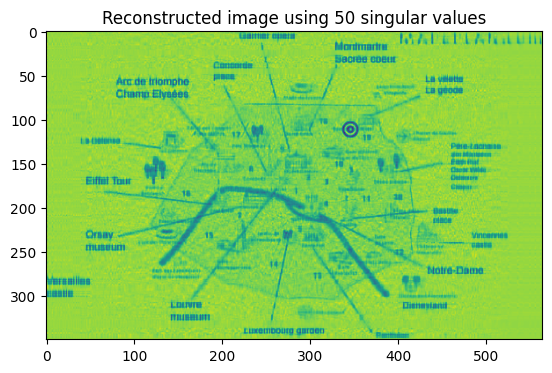

In [32]:
num_component = 50
reconstruct_img_50 = np.matrix(U[:, :num_component]) * np.diag(s[:num_component]) * np.matrix(V[:num_component, :])
plt.imshow(reconstruct_img_50)
plt.title("Reconstructed image using 50 singular values")

###### Reconstructing the image using top 100 singular vectors.

Text(0.5, 1.0, 'Reconstructed image using 100 singular values')

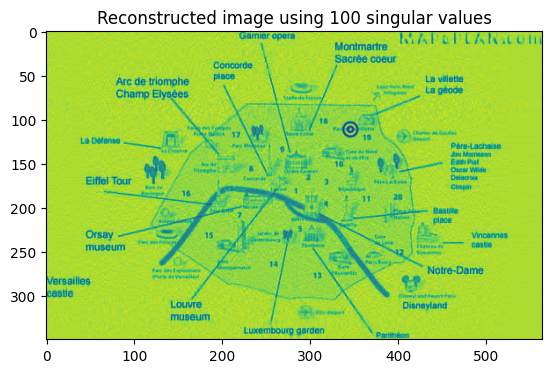

In [33]:
num_component = 100
reconstruct_img_100 = np.matrix(U[:, :num_component]) * np.diag(s[:num_component]) * np.matrix(V[:num_component, :])
plt.imshow(reconstruct_img_100)
plt.title("Reconstructed image using 100 singular values")

###### Reconstructing the image using top 350 singular vectors.

Text(0.5, 1.0, 'Reconstructed image using 350 singular values')

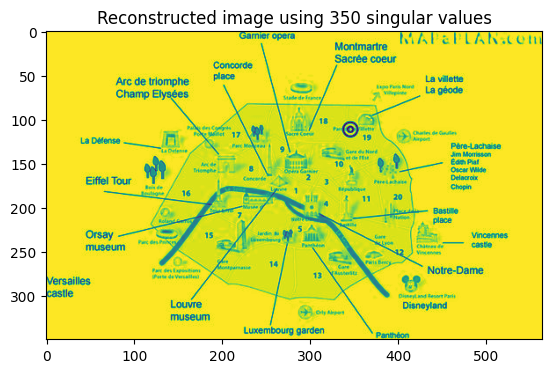

In [34]:
num_component = 350
reconstruct_img_350 = np.matrix(U[:, :num_component]) * np.diag(s[:num_component]) * np.matrix(V[:num_component, :])
plt.imshow(reconstruct_img_350)
plt.title("Reconstructed image using 350 singular values")

###### Comparision of the reconstructed image using different number of top components

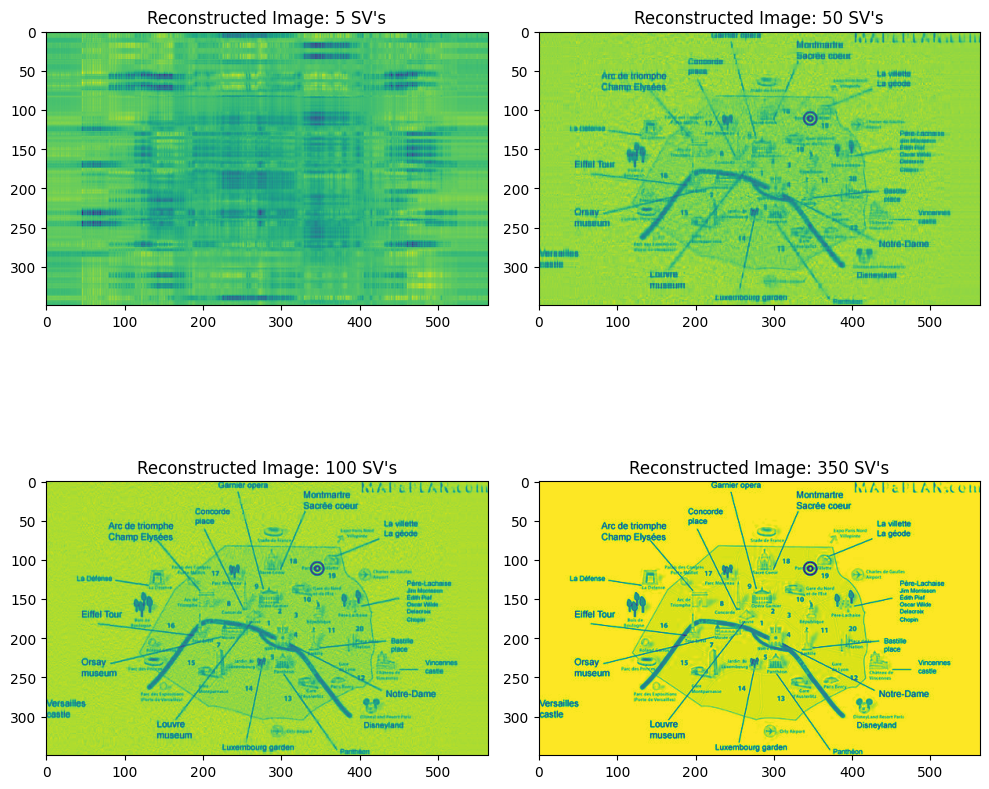

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].imshow(reconstruct_img_5)
axs[0,0].set_title("Reconstructed Image: 5 SV's")
axs[0,1].imshow(reconstruct_img_50)
axs[0,1].set_title("Reconstructed Image: 50 SV's")
axs[1,0].imshow(reconstruct_img_100)
axs[1,0].set_title("Reconstructed Image: 100 SV's")
axs[1,1].imshow(reconstruct_img_350)
axs[1,1].set_title("Reconstructed Image: 350 SV's")
plt.tight_layout()
plt.show()